# 实证模型

## 模型设计

### Bivariate Probit model

孟庆斌的模型：

$$
\text{Fraud}_{it} = \beta_{F1}\text{Short}_{it} + \beta_{F2}\text{List}_{it} + X_{Fit}^{T}\mathbf{\beta}_{Fit} + u_{it}\\
\text{Detect}_{it} = \beta_{D1}\text{Short}_{it} + \beta_{D2}\text{List}_{it} + X_{Dit}^{T}\mathbf{\beta}_{Dit} + v_{it}
$$

$\text{List}$即为DID模型中处理组标志，$\text{Short}$是DID中的时间标志和处理标志的乘积  
由此，上面的模型，若用经典的DID模型来写应为：

$$
\text{Fraud}_{it} = \beta_{F1}\text{Short}\times \text{POST}_{it} + \beta_{F2}\text{List}_{it} + \beta_{F3}\text{POST}_{it}
+ X_{Fit}^{T}\mathbf{\beta}_{Fit} + u_{it}\\
\text{Detect}_{it} = \beta_{D1}\text{Short}\times \text{POST}_{it} + \beta_{D2}\text{List}_{it} + \beta_{D3}\text{POST}_{it}
+ X_{Dit}^{T}\mathbf{\beta}_{Dit} + v_{it}
$$

那它为什么那样写？ 我也不知道。。。（或许按原来那样写，他会出现不显著的情况？）

因此，本文的相应的实证模型就应该是：

$$
\text{TK}_{it} = \beta_{T1}\text{Short}_{it} + \beta_{T2}\text{List}_{it} + X_{Tit}^{T}\mathbf{\beta}_{Tit} + u_{it}\\
\text{Detect}_{it} = \beta_{D1}\text{Short}_{it} + \beta_{D2}\text{List}_{it} + X_{Dit}^{T}\mathbf{\beta}_{Dit} + v_{it}
$$

或者
$$
\text{TK}_{it} = \beta_{T1}\text{Short}\times \text{POST}_{it} + \beta_{T2}\text{List}_{it} + \beta_{T3}\text{POST}_{it}
+ X_{Tit}^{T}\mathbf{\beta}_{Tit} + u_{it}\\
\text{Detect}_{it} = \beta_{D1}\text{Short}\times \text{POST}_{it} + \beta_{D2}\text{List}_{it} + \beta_{D3}\text{POST}_{it}
+ X_{Dit}^{T}\mathbf{\beta}_{Dit} + v_{it}
$$

虚拟变量很容易解决，下面来解决控制变量  
我们首先看一下手头有的控制变量  
我们将这些控制变量分类：
1. 公司特征  
    * 行业
    * 省份
    * 创立时间
    * 上市时间
    * 所在省份
    * 所在城市
    * 产权性质
    * 资产规模
    * 固定资产规模
    * 负债总额
    * 资产负债率
    * 固定资产占比
    * 营收增长率
    * ROA
    * TobinQ
    * 账面市值比
    * 营业收入
    * 营业利润
    * 净利润
2. 市场表现  
    * 回报率
    * 换手率
3. 股权情况  
    这些变量可以视为内部控制情况的表征
    * 第一大股东持股比例
    * 第二到第十大股东持股比例
    * 股权制衡度
    * 机构投资者持股占比
    * 管理层持股占比
    * 两职合一
    * 董事会规模
    * 独立董事占比
4. 外部环境  
    * 分析师追踪人数
    * 审计机构是否是四大

从数据提取上，我们可以一次性提取所有数据，构成一张“大表”  
然后选择不同的控制变量组合，查看是否有能让实证结果显著的  
但很明显，不可能通过排列组合的方式来实现，$\sum_{i=0}^{31}{31\choose i}=2^{31}$, 总的组合方式的个数就已经是一个天文数字，所以分析是必要的  
分析上，笔者的思路是，参考和本文研究内容“类似”的文献，先尝试他们所选择的控制变量，最相似的应是孟庆斌，武晨，侯青川三人的论文

## DID

武晨的模型：

$$
\text{Fraud}_{it} = \beta_{0}+\beta_{1}\text{List}_{it}+\beta_{2}\text{Short}_{it}+X_{it}^{T}\gamma +u_{it}
$$

没什么好说的

$$
\text{Fraud}_{it} = \beta_{0}+\beta_{1}\text{Margin}_{it}+X_{it}^{T}\gamma +u_{it}\\
\text{Fraud}_{it} = \beta_{0}+\beta_{1}\text{Short}_{it}+X_{it}^{T}\gamma +u_{it}\\
\text{Fraud}_{it} = \beta_{0}+\beta_{1}\text{Margin}_{it}+ \beta_{2}\text{Short}_{it} +X_{it}^{T}\gamma +u_{it}
$$
这三个模型是用来分别检验融资、融资两者对掏空的影响的，也没什么好说的  
（若本文使用这三个模型，结果很可能是显著的，因为，，，他的Fraud就是本文的TK）

# DID with multiple time periods

这个模型的问题在于，他没有一个像上面两个模型一样的显式的Formula（当然，也可能是我还没看原文）  
解决方法：当然或许在论文原文里有，到时候可以写过来，如果没有，那么用期望的形式来表示应该业不是不可以

那么，是时候开始实操了，希望能得到显著的结果把。。。妈的没显著怎么办啊。。。。。。。。。。。

## 试验--BiProbit

### 控制变量组别1

公司规模、资产负债率、产权性质、上市年限（对数（1+上市年限））、第一大股东持股比例、高管持股比例、机构投资者持股比例、两职合一、董事会规模（对数）、独立董事比例、分析师追踪人数（对数）、审计机构、收益率、换手率、TobinQ、行业、公司

具体为：

TK 公司规模、收益率、产权性质、独立董事比例、董事会规模（对数）、第一大股东持股比例、高管持股比例、两职合一、审计机构、机构投资者持股比例、分析师追踪人数（对数）行业、公司  
Detect 资产负债率、上市年限（对数（1+上市年限））、营收增长率、审计机构、机构投资者持股比例、分析师追踪人数（对数）

In [1]:
import os
os.chdir(r'D:\paper\rowdata\ST')
import pandas as pd
import numpy as np

In [3]:
row_data = pd.read_csv("row_data_222.csv", dtype={"Code": str, "Time": str})
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Glccg,Lzhy,Dshgm,Fxszz,Sjjg,Industry,Cqxz,Qynl,Ssnx,Ltsz
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,0.2348,0.0,2.397895,63.0,1.0,K,1.0,22.0,2.995732,7.957169e+10
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,0.2209,0.0,2.397895,59.0,1.0,K,1.0,23.0,3.044522,7.231150e+10
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,0.2142,0.0,2.397895,57.0,1.0,K,1.0,24.0,3.091042,9.796418e+10
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,0.2884,0.0,2.397895,53.0,1.0,K,1.0,25.0,3.135494,7.789111e+10
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,0.1815,0.0,2.397895,38.0,1.0,K,1.0,26.0,3.178054,1.351430e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,605376,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,6.4982,0.0,2.197225,6.0,0.0,C,0.0,11.0,0.693147,1.470920e+10
21523,605377,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,22.8094,0.0,2.197225,4.0,0.0,C,0.0,12.0,0.693147,2.402765e+09
21524,605388,2021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,34.4222,0.0,2.302585,1.0,0.0,C,0.0,23.0,0.693147,2.562212e+09
21525,605399,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,66.6472,0.0,1.945910,1.0,0.0,C,0.0,15.0,0.693147,2.584241e+09


In [4]:
row_data["Code"] = row_data["Code"].astype('category')
row_data["Time"] = row_data["Time"].astype('category')
row_data["Industry"] = row_data["Industry"].astype('category')

In [5]:
row_data.to_stata("row_data_3.dta")

卧槽，显著了。。。  
`reg Vio_wide Short Treated Glccg Zczelog Zcfz Sjjg Cqxz Ssnx Time Industry`

`biprobit (Vio_wide Short Treated Post Zczelog Zcfz Ssnx First Lzhy Ddzb Sjjg TobinQ Yszz Cqxz Industry) (detect Short Treated Post Zczelog Zcfz Ssnx Sjjg Yszz Cqxz Industry), r partial difficult`显著了。。。

`reg Vio_wide Short Treated Post First Glccg Zczelog Zcfz Sjjg Cqxz Ssnx Time Industry Code`

`reg NumVio_wide Rzye Zczelog First Zcfz TobinQ Sjjg Industry Time Code`  
`reg NumVio_wide Rqye Zczelog First Zcfz TobinQ Sjjg Industry Time Code`

In [8]:
row_data_1 = row_data[row_data["Post"]==1]

In [9]:
row_data_1.to_stata("row_data_4.dta", write_index=False)

In [10]:
%hist

import os
os.chdir(r'D:\paper\rowdata\ST')
import pandas as pd
import numpy as np
row_data = pd.read_csv("row_data_222.csv", dtype={"Code": str, "Time": str})
row_data
row_data["Code"] = row_data["Code"].astype('category')
row_data["Time"] = row_data["Time"].astype('category')
row_data["Industry"] = row_data["Industry"].astype('category')
row_data.to_stata("row_data_3.dta")
row_data
row_data[row_data["Post"]==1]
row_data_1 = row_data[row_data["Post"]==1]
row_data_1.to_stata("row_data_4.dta", write_index=False)
%hist


In [2]:
import os
os.chdir(r'D:\paper\rowdata\ST')
import pandas as pd
import numpy as np
row_data = pd.read_csv("row_data_888.csv", dtype={"Code": str, "Time": str})

row_data["Code"] = row_data["Code"].astype('category')
row_data["Time"] = row_data["Time"].astype('category')
row_data["Industry"] = row_data["Industry"].astype('category')


row_data["Short"] = row_data["Treated"] * row_data["Post"]
row_data["Detect"] = row_data["Vio_wide"]
row_data["Short"] = ['Y' if i == 1 else 'N' for i in row_data["Short"]]
row_data["Short"] = row_data["Short"].astype('category')
# row_data_1 = row_data[row_data["Post"]==1]
#row_data.to_stata("row_data_996.dta", write_index=False)

`reg Vio_wide Short Treated Post First Lzhy Gqzhd Ddzb TobinQ Zczelog Zcfz Ssnx Sjjg Hbl Hsl Fxszz Cqxz Industry Time`

In [25]:
list(row_data[row_data["Code"]=='000002']["Vio_wide"].shift(-1))

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan]

In [3]:
vio_1 = []
vio_1_wide = []
vio_2 = []
vio_2_wide = []

code_ls = []
for item in row_data["Code"]:
    if item not in code_ls:
        code_ls.append(item)

for item_1 in code_ls:
    vio_1_wide = vio_1_wide + list(row_data[row_data["Code"]==item_1]["Vio_wide"].shift(-1))
    vio_1 = vio_1 + list(row_data[row_data["Code"]==item_1]["Vio"].shift(-1))
    vio_2_wide = vio_2_wide + list(row_data[row_data["Code"]==item_1]["Vio_wide"].shift(-2))
    vio_2 = vio_2 + list(row_data[row_data["Code"]==item_1]["Vio"].shift(-2))
    
vio_1_wide

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [5]:
row_data["Vio_1"] = vio_1
row_data["Vio_1_wide"] = vio_1_wide
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Cqxz,Qynl,Ssnx,Ltsz,Two_ten,Gqzhd,Short,Detect,Vio_1,Vio_1_wide
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,1.0,22.0,2.995732,7.957169e+10,0.080461,0.2797,Y,0.0,0.0,0.0
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,1.0,23.0,3.044522,7.231150e+10,0.084157,0.3232,Y,0.0,0.0,0.0
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,1.0,24.0,3.091042,9.796418e+10,0.087051,0.3159,Y,0.0,0.0,0.0
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,1.0,25.0,3.135494,7.789111e+10,0.075971,0.2762,Y,0.0,0.0,0.0
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,1.0,26.0,3.178054,1.351430e+11,0.229777,1.2515,Y,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21244,605376,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,11.0,0.693147,1.470920e+10,0.424635,1.5282,N,0.0,NaN,NaN
21245,605377,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,12.0,0.693147,2.402765e+09,0.320369,0.8887,N,0.0,NaN,NaN
21246,605388,2021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,23.0,0.693147,2.562212e+09,0.465966,1.2345,N,1.0,NaN,NaN
21247,605399,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,15.0,0.693147,2.584241e+09,0.426052,1.2491,N,0.0,NaN,NaN


In [33]:
row_data.dropna().to_stata("row_data_123.dta", write_index=False)

In [35]:
row_data = row_data.drop(['Vio_1', 'Vio_1_wide'], axis=1)

In [11]:
row_data["Vio_2"] = vio_2
row_data["Vio_2_wide"] = vio_2_wide
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Cqxz,Qynl,Ssnx,Ltsz,Two_ten,Gqzhd,Short,Detect,Vio_2,Vio_2_wide
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,1.0,22.0,2.995732,7.957169e+10,0.080461,0.2797,Y,0.0,0.0,0.0
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,1.0,23.0,3.044522,7.231150e+10,0.084157,0.3232,Y,0.0,0.0,0.0
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,1.0,24.0,3.091042,9.796418e+10,0.087051,0.3159,Y,0.0,0.0,0.0
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,1.0,25.0,3.135494,7.789111e+10,0.075971,0.2762,Y,0.0,0.0,0.0
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,1.0,26.0,3.178054,1.351430e+11,0.229777,1.2515,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21244,605376,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,11.0,0.693147,1.470920e+10,0.424635,1.5282,N,0.0,NaN,NaN
21245,605377,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,12.0,0.693147,2.402765e+09,0.320369,0.8887,N,0.0,NaN,NaN
21246,605388,2021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,23.0,0.693147,2.562212e+09,0.465966,1.2345,N,1.0,NaN,NaN
21247,605399,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,15.0,0.693147,2.584241e+09,0.426052,1.2491,N,0.0,NaN,NaN


In [37]:
row_data.dropna().to_stata("row_data_123.dta", write_index=False)

`reg Vio_2_wide Short Treated First Lzhy Gqzhd Zczelog Zcfz Ssnx2 TobinQ Sjjg Hbl Hsl Cqxz Industry Time`

In [10]:
row_data = row_data.drop(['Vio_2', 'Vio_2_wide'], axis=1)
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Sjjg,Industry,Cqxz,Qynl,Ssnx,Ltsz,Two_ten,Gqzhd,Short,Detect
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,1.0,K,1.0,22.0,2.995732,7.957169e+10,0.080461,0.2797,Y,0.0
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,1.0,K,1.0,23.0,3.044522,7.231150e+10,0.084157,0.3232,Y,0.0
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,1.0,K,1.0,24.0,3.091042,9.796418e+10,0.087051,0.3159,Y,0.0
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,1.0,K,1.0,25.0,3.135494,7.789111e+10,0.075971,0.2762,Y,0.0
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,1.0,K,1.0,26.0,3.178054,1.351430e+11,0.229777,1.2515,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21244,605376,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,C,0.0,11.0,0.693147,1.470920e+10,0.424635,1.5282,N,0.0
21245,605377,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,C,0.0,12.0,0.693147,2.402765e+09,0.320369,0.8887,N,0.0
21246,605388,2021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,C,0.0,23.0,0.693147,2.562212e+09,0.465966,1.2345,N,1.0
21247,605399,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,C,0.0,15.0,0.693147,2.584241e+09,0.426052,1.2491,N,0.0


In [9]:
#row_data["Vio_1"] = vio_1
#row_data["Vio_1_wide"] = vio_1_wide
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Cqxz,Qynl,Ssnx,Ltsz,Two_ten,Gqzhd,Short,Detect,Vio_2,Vio_2_wide
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,1.0,22.0,2.995732,7.957169e+10,0.080461,0.2797,Y,0.0,0.0,0.0
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,1.0,23.0,3.044522,7.231150e+10,0.084157,0.3232,Y,0.0,0.0,0.0
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,1.0,24.0,3.091042,9.796418e+10,0.087051,0.3159,Y,0.0,0.0,0.0
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,1.0,25.0,3.135494,7.789111e+10,0.075971,0.2762,Y,0.0,0.0,0.0
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,1.0,26.0,3.178054,1.351430e+11,0.229777,1.2515,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21244,605376,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,11.0,0.693147,1.470920e+10,0.424635,1.5282,N,0.0,NaN,NaN
21245,605377,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,12.0,0.693147,2.402765e+09,0.320369,0.8887,N,0.0,NaN,NaN
21246,605388,2021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,23.0,0.693147,2.562212e+09,0.465966,1.2345,N,1.0,NaN,NaN
21247,605399,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,15.0,0.693147,2.584241e+09,0.426052,1.2491,N,0.0,NaN,NaN


In [40]:
row_data.dropna().to_stata("row_data_133.dta", write_index=False)

`biprobit (Vio_1_wide Short Treated Post Zczelog Zcfz Ssnx First Lzhy Ddzb Sjjg TobinQ Yszz Cqxz Industry) (Detect Short Treated Post Zczelog Zcfz Ssnx Sjjg Yszz Cqxz Industry), r partial difficult`

In [6]:
row_data["Time"] = [int(i) for i in row_data["Time"]]
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Cqxz,Qynl,Ssnx,Ltsz,Two_ten,Gqzhd,Short,Detect,Vio_2,Vio_2_wide
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,1.0,22.0,2.995732,7.957169e+10,0.080461,0.2797,Y,0.0,0.0,0.0
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,1.0,23.0,3.044522,7.231150e+10,0.084157,0.3232,Y,0.0,0.0,0.0
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,1.0,24.0,3.091042,9.796418e+10,0.087051,0.3159,Y,0.0,0.0,0.0
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,1.0,25.0,3.135494,7.789111e+10,0.075971,0.2762,Y,0.0,0.0,0.0
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,1.0,26.0,3.178054,1.351430e+11,0.229777,1.2515,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21244,605376,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,11.0,0.693147,1.470920e+10,0.424635,1.5282,N,0.0,NaN,NaN
21245,605377,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,12.0,0.693147,2.402765e+09,0.320369,0.8887,N,0.0,NaN,NaN
21246,605388,2021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,23.0,0.693147,2.562212e+09,0.465966,1.2345,N,1.0,NaN,NaN
21247,605399,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,15.0,0.693147,2.584241e+09,0.426052,1.2491,N,0.0,NaN,NaN


In [42]:
row_data.dropna().to_stata("row_data_135.dta", write_index=False)

In [46]:
pd.DataFrame({'a': [i for i in range(1, 1000)], 'b': [2*i for i in range(1, 1000)]}).to_stata("111.dta", write_index=False)

In [12]:
q = row_data[row_data["Time"]<=2019]
q

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Treated,Treated_wide,Post,Rzmr,...,Cqxz,Qynl,Ssnx,Ltsz,Two_ten,Gqzhd,Short,Detect,Vio_2,Vio_2_wide
0,000002,2010,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.010167,...,1.0,22.0,2.995732,7.957169e+10,0.080461,0.2797,Y,0.0,0.0,0.0
1,000002,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.047444,...,1.0,23.0,3.044522,7.231150e+10,0.084157,0.3232,Y,0.0,0.0,0.0
2,000002,2012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.036554,...,1.0,24.0,3.091042,9.796418e+10,0.087051,0.3159,Y,0.0,0.0,0.0
3,000002,2013,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.256302,...,1.0,25.0,3.135494,7.789111e+10,0.075971,0.2762,Y,0.0,0.0,0.0
4,000002,2014,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.232966,...,1.0,26.0,3.178054,1.351430e+11,0.229777,1.2515,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,603998,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,18.0,1.609438,1.985669e+09,0.158011,0.3431,N,0.0,0.0,0.0
21189,603998,2019,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,19.0,1.791759,3.529133e+09,0.154497,0.3434,N,1.0,0.0,0.0
21192,603999,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,7.0,0.693147,3.377664e+09,0.135106,0.1606,N,0.0,0.0,0.0
21193,603999,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,8.0,1.098612,1.771776e+09,0.107638,0.1170,N,0.0,0.0,0.0


In [13]:
q.dropna().to_stata("row_1234.dta", write_index=False)

---

# 尝试

## Biporbit

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir(r'D:\paper\rowdata\1')
row_data = pd.read_csv("row_data.csv", dtype={"Code":str, "Time":str})
row_data

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Qtysk,Qtyfk,Zcze,Zczelog,...,Industry,Industry_d,Qynl,Ssnx,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
0,000002,2009-12-31,0,0,0,0,4.049738e+10,5.208563e+09,6.150412e+10,24.842370,...,K,K70,21,18,1,2.944439,1.293807,0.075733,2.873544e+09,2.874475e+09
1,000002,2010-12-31,0,0,0,0,5.649274e+10,1.310024e+10,8.446798e+10,25.159638,...,K,K70,22,19,1,2.995732,1.059200,0.054805,3.075290e+09,3.083108e+09
2,000002,2011-12-31,0,0,0,0,6.590512e+10,2.305988e+10,9.172550e+10,25.242066,...,K,K70,23,20,1,3.044522,0.626153,0.063567,4.366492e+09,4.372887e+09
3,000002,2012-12-31,0,0,0,0,8.910113e+10,2.739208e+10,1.265448e+11,25.563862,...,K,K70,24,21,1,3.091042,0.668239,0.071580,5.607606e+09,5.613873e+09
4,000002,2013-12-31,0,0,0,0,1.301451e+11,4.418138e+10,1.636583e+11,25.821047,...,K,K70,25,22,1,3.135494,0.712191,0.076325,7.791416e+09,7.795896e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38683,605599,2017-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,23,-4,0,NaN,1.397437,0.073352,NaN,NaN
38684,605599,2018-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,24,-3,0,NaN,0.936766,0.092568,NaN,NaN
38685,605599,2019-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,25,-2,0,NaN,1.110823,0.093244,NaN,NaN
38686,605599,2020-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,26,-1,0,NaN,1.280476,0.131845,NaN,NaN


### 尝试1

2014-2019

In [3]:
row_data["Time"] = [i[:4] for i in row_data["Time"]]
row_data["Time"] = row_data["Time"].astype(int)
test_1 = row_data[row_data["Time"]>=2014]
test_1 = test_1[test_1["Time"]<=2019]

In [4]:
test_1

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Qtysk,Qtyfk,Zcze,Zczelog,...,Industry,Industry_d,Qynl,Ssnx,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
5,000002,2014,0,0,0,0,1.225832e+11,5.042067e+10,1.746387e+11,25.885985,...,K,K70,26,23,1,3.178054,0.845271,0.077816,1.172676e+10,1.188673e+10
6,000002,2015,0,0,0,0,1.381808e+11,7.153503e+10,1.945915e+11,25.994168,...,K,K70,27,24,1,3.218876,1.415158,0.093969,9.910446e+09,9.949955e+09
7,000002,2016,0,1,0,1,1.513875e+11,8.488706e+10,2.205133e+11,26.119224,...,K,K70,28,25,1,3.258097,0.701672,0.096350,1.274702e+10,1.277715e+10
8,000002,2017,0,0,0,0,2.258973e+11,1.391770e+11,3.302305e+11,26.523057,...,K,K70,29,26,1,3.295837,0.521176,0.101849,1.343749e+10,1.343722e+10
9,000002,2018,0,0,0,0,3.347578e+11,1.980816e+11,4.563822e+11,26.846596,...,K,K70,30,27,1,3.332205,0.339403,0.093338,2.314734e+10,2.298635e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38681,605599,2015,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,21,-6,0,NaN,1.579228,0.075180,NaN,NaN
38682,605599,2016,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,22,-5,0,NaN,1.372921,0.066722,NaN,NaN
38683,605599,2017,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,23,-4,0,NaN,1.397437,0.073352,NaN,NaN
38684,605599,2018,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,24,-3,0,NaN,0.936766,0.092568,NaN,NaN


In [5]:
test_1 = test_1.copy()

In [6]:
test_1.columns

Index(['Code', 'Time', 'Vio', 'Vio_wide', 'NumVio', 'NumVio_wide', 'Qtysk',
       'Qtyfk', 'Zcze', 'Zczelog', 'Qtyskzj', 'Zjzy', 'Zjzy_t', 'Qtyskzj_t',
       'Treated', 'Treated_wide', 'Post', 'Rzrq', 'Rzmr', 'Rzye', 'Rqmc',
       'Rqye', 'Ltsz', 'Ltszlog', 'Zcfz', 'Yszz', 'Roa', 'TobinQ', 'Zmszb',
       'Hbl', 'Hsl', 'First', 'Two_ten', 'Gqzhd', 'Jgtzz', 'Lzhy', 'Glccg',
       'Dshgm', 'Dshgmlog', 'Ddzb', 'Fxszz', 'Fxslg', 'Sjjg', 'Industry',
       'Industry_d', 'Qynl', 'Ssnx', 'Cqxz', 'Ssnxlog', 'HTobinQ', 'HHI',
       'Yylr', 'Jlr'],
      dtype='object')

In [7]:
test_1 = test_1.iloc[:, [0,1,3,5,8,9,14,15,16,17, 18,19,20,21, 22,23, 24,25,26,27, 
                         29,30, 31,32,33,34,35,36,37,38,39,40,41,42, 43,47,48,49,50,51,
                        52]]
test_1

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Treated,Treated_wide,Post,Rzrq,...,Fxszz,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
5,000002,2014,0,0,1.746387e+11,25.885985,1,1,1,1,...,38.0,3.663562,1.0,K,1,3.178054,0.845271,0.077816,1.172676e+10,1.188673e+10
6,000002,2015,0,0,1.945915e+11,25.994168,1,1,1,1,...,39.0,3.688879,1.0,K,1,3.218876,1.415158,0.093969,9.910446e+09,9.949955e+09
7,000002,2016,1,1,2.205133e+11,26.119224,1,1,1,1,...,26.0,3.295837,1.0,K,1,3.258097,0.701672,0.096350,1.274702e+10,1.277715e+10
8,000002,2017,0,0,3.302305e+11,26.523057,1,1,1,1,...,42.0,3.761200,1.0,K,1,3.295837,0.521176,0.101849,1.343749e+10,1.343722e+10
9,000002,2018,0,0,4.563822e+11,26.846596,1,1,1,1,...,45.0,3.828641,1.0,K,1,3.332205,0.339403,0.093338,2.314734e+10,2.298635e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38681,605599,2015,0,0,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,F,0,NaN,1.579228,0.075180,NaN,NaN
38682,605599,2016,0,0,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,F,0,NaN,1.372921,0.066722,NaN,NaN
38683,605599,2017,0,0,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,F,0,NaN,1.397437,0.073352,NaN,NaN
38684,605599,2018,0,0,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,F,0,NaN,0.936766,0.092568,NaN,NaN


In [8]:
test_1.columns

Index(['Code', 'Time', 'Vio_wide', 'NumVio_wide', 'Zcze', 'Zczelog', 'Treated',
       'Treated_wide', 'Post', 'Rzrq', 'Rzmr', 'Rzye', 'Rqmc', 'Rqye', 'Ltsz',
       'Ltszlog', 'Zcfz', 'Yszz', 'Roa', 'TobinQ', 'Hbl', 'Hsl', 'First',
       'Two_ten', 'Gqzhd', 'Jgtzz', 'Lzhy', 'Glccg', 'Dshgm', 'Dshgmlog',
       'Ddzb', 'Fxszz', 'Fxslg', 'Sjjg', 'Industry', 'Cqxz', 'Ssnxlog',
       'HTobinQ', 'HHI', 'Yylr', 'Jlr'],
      dtype='object')

In [9]:
test_1 = test_1.dropna()

In [10]:
test_1

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Treated,Treated_wide,Post,Rzrq,...,Fxszz,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
5,000002,2014,0,0,1.746387e+11,25.885985,1,1,1,1,...,38.0,3.663562,1.0,K,1,3.178054,0.845271,0.077816,1.172676e+10,1.188673e+10
6,000002,2015,0,0,1.945915e+11,25.994168,1,1,1,1,...,39.0,3.688879,1.0,K,1,3.218876,1.415158,0.093969,9.910446e+09,9.949955e+09
7,000002,2016,1,1,2.205133e+11,26.119224,1,1,1,1,...,26.0,3.295837,1.0,K,1,3.258097,0.701672,0.096350,1.274702e+10,1.277715e+10
8,000002,2017,0,0,3.302305e+11,26.523057,1,1,1,1,...,42.0,3.761200,1.0,K,1,3.295837,0.521176,0.101849,1.343749e+10,1.343722e+10
9,000002,2018,0,0,4.563822e+11,26.846596,1,1,1,1,...,45.0,3.828641,1.0,K,1,3.332205,0.339403,0.093338,2.314734e+10,2.298635e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37202,603998,2018,0,0,1.537012e+09,21.153106,0,0,0,0,...,0.0,0.000000,0.0,C,0,1.609438,2.933394,0.029387,7.900926e+07,6.949832e+07
37203,603998,2019,1,1,1.793355e+09,21.307354,0,0,0,0,...,0.0,0.000000,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07
37213,603999,2016,0,0,1.751648e+09,21.283823,0,0,0,0,...,1.0,0.693147,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07
37214,603999,2017,0,0,1.809583e+09,21.316362,0,0,0,0,...,1.0,0.693147,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07


# 清楚曾被剔除过标的的证券

In [11]:
test_1.iloc[0, :].name

5

In [12]:
code_ls = []
for i in test_1["Code"]:
    if i not in code_ls:
        code_ls.append(i)
        
tc_code = []
for i in range(len(test_1["Code"])):
    if test_1.iloc[i,:][6] != test_1.iloc[i,:][7]:
        tc_code.append(test_1.iloc[i,:].name)

tc_code

[967,
 968,
 993,
 994,
 995,
 996,
 997,
 998,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1435,
 1436,
 1437,
 1438,
 1439,
 1440,
 1554,
 1555,
 1556,
 1557,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 2309,
 2386,
 2387,
 2388,
 2389,
 3229,
 3230,
 3232,
 3233,
 3234,
 3320,
 3321,
 3322,
 3323,
 3324,
 3325,
 3606,
 3607,
 3608,
 3609,
 3610,
 3611,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3775,
 3776,
 3777,
 3778,
 3779,
 3780,
 3905,
 3906,
 3907,
 3908,
 3909,
 3910,
 4282,
 4283,
 4284,
 4285,
 4286,
 4287,
 4529,
 4530,
 4531,
 4532,
 4533,
 4534,
 4854,
 4855,
 4856,
 4857,
 4858,
 4859,
 5140,
 5141,
 5142,
 5143,
 5144,
 5145,
 5322,
 5324,
 5325,
 5326,
 5327,
 5351,
 5352,
 5353,
 5907,
 5908,
 5909,
 5910,
 5911,
 5912,
 5921,
 5922,
 5923,
 5924,
 5925,
 6505,
 6506,
 6507,
 6508,
 6509,
 6726,
 6727,
 6728,
 6729,
 6730,
 6731,
 7389,
 7390,
 7391,
 7392,
 7949,
 7950,
 7951,
 7952,
 7953,
 8234,
 8235,
 8236,
 8237,
 8238,
 8239,
 8494,
 8495,
 8496,
 8497,
 8498,


In [13]:
test_1 = test_1.drop(tc_code)

## 剔除资不抵债公司

In [14]:
test_1 = test_1[test_1["Zcfz"]<1]
test_1

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Treated,Treated_wide,Post,Rzrq,...,Fxszz,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
5,000002,2014,0,0,1.746387e+11,25.885985,1,1,1,1,...,38.0,3.663562,1.0,K,1,3.178054,0.845271,0.077816,1.172676e+10,1.188673e+10
6,000002,2015,0,0,1.945915e+11,25.994168,1,1,1,1,...,39.0,3.688879,1.0,K,1,3.218876,1.415158,0.093969,9.910446e+09,9.949955e+09
7,000002,2016,1,1,2.205133e+11,26.119224,1,1,1,1,...,26.0,3.295837,1.0,K,1,3.258097,0.701672,0.096350,1.274702e+10,1.277715e+10
8,000002,2017,0,0,3.302305e+11,26.523057,1,1,1,1,...,42.0,3.761200,1.0,K,1,3.295837,0.521176,0.101849,1.343749e+10,1.343722e+10
9,000002,2018,0,0,4.563822e+11,26.846596,1,1,1,1,...,45.0,3.828641,1.0,K,1,3.332205,0.339403,0.093338,2.314734e+10,2.298635e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37202,603998,2018,0,0,1.537012e+09,21.153106,0,0,0,0,...,0.0,0.000000,0.0,C,0,1.609438,2.933394,0.029387,7.900926e+07,6.949832e+07
37203,603998,2019,1,1,1.793355e+09,21.307354,0,0,0,0,...,0.0,0.000000,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07
37213,603999,2016,0,0,1.751648e+09,21.283823,0,0,0,0,...,1.0,0.693147,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07
37214,603999,2017,0,0,1.809583e+09,21.316362,0,0,0,0,...,1.0,0.693147,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07


## 剔除ST公司

In [15]:
os.chdir(r'D:\paper\rowdata\ST')
ST = pd.read_csv("ST.csv", dtype={"Symbol": str})
ST = ST[ST["FirstSTDate"].notnull()]["Symbol"].values

ST_ls = []
for item in test_1["Code"]:
    if item in ST:
        ST_ls.append(1)
    else:
        ST_ls.append(0)

test_1["ST"] = ST_ls
test_1

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Treated,Treated_wide,Post,Rzrq,...,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr,ST
5,000002,2014,0,0,1.746387e+11,25.885985,1,1,1,1,...,3.663562,1.0,K,1,3.178054,0.845271,0.077816,1.172676e+10,1.188673e+10,0
6,000002,2015,0,0,1.945915e+11,25.994168,1,1,1,1,...,3.688879,1.0,K,1,3.218876,1.415158,0.093969,9.910446e+09,9.949955e+09,0
7,000002,2016,1,1,2.205133e+11,26.119224,1,1,1,1,...,3.295837,1.0,K,1,3.258097,0.701672,0.096350,1.274702e+10,1.277715e+10,0
8,000002,2017,0,0,3.302305e+11,26.523057,1,1,1,1,...,3.761200,1.0,K,1,3.295837,0.521176,0.101849,1.343749e+10,1.343722e+10,0
9,000002,2018,0,0,4.563822e+11,26.846596,1,1,1,1,...,3.828641,1.0,K,1,3.332205,0.339403,0.093338,2.314734e+10,2.298635e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37202,603998,2018,0,0,1.537012e+09,21.153106,0,0,0,0,...,0.000000,0.0,C,0,1.609438,2.933394,0.029387,7.900926e+07,6.949832e+07,0
37203,603998,2019,1,1,1.793355e+09,21.307354,0,0,0,0,...,0.000000,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07,0
37213,603999,2016,0,0,1.751648e+09,21.283823,0,0,0,0,...,0.693147,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07,0
37214,603999,2017,0,0,1.809583e+09,21.316362,0,0,0,0,...,0.693147,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07,0


In [16]:
test_1 = test_1[test_1["ST"]!=1]

In [17]:
test_1 = test_1.drop(["ST"],axis=1)

In [18]:
test_1["Rzmr"] = test_1["Rzmr"] / test_1["Ltsz"]
test_1["Rqmc"] = test_1["Rqmc"] / test_1["Ltsz"]
test_1["Rzye"] = test_1["Rzye"] / test_1["Ltsz"]
test_1["Rqye"] = test_1["Rqye"] / test_1["Ltsz"]

## 缩尾

In [19]:
row_data = test_1.copy()

In [20]:
from scipy.stats.mstats import winsorize

row_data["Zczelog"] = winsorize(row_data["Zczelog"], limits=[0.01, 0.01])
row_data["Ltszlog"] = winsorize(row_data["Ltszlog"], limits=[0.01, 0.01])
row_data["Zcfz"] = winsorize(row_data["Zcfz"], limits=[0.01, 0.01])
row_data["Yszz"] = winsorize(row_data["Yszz"], limits=[0.01, 0.01])
row_data["Roa"] = winsorize(row_data["Roa"], limits=[0.01, 0.01])
row_data["TobinQ"] = winsorize(row_data["TobinQ"], limits=[0.01, 0.01])
row_data["Hbl"] = winsorize(row_data["Hbl"], limits=[0.01, 0.01])
row_data["Hsl"] = winsorize(row_data["Hsl"], limits=[0.01, 0.01])
row_data["First"] = winsorize(row_data["First"], limits=[0.01, 0.01])
row_data["Two_ten"] = winsorize(row_data["Two_ten"], limits=[0.01, 0.01])
row_data["Gqzhd"] = winsorize(row_data["Gqzhd"], limits=[0.01, 0.01])
row_data["Jgtzz"] = winsorize(row_data["Jgtzz"], limits=[0.01, 0.01])
row_data["Glccg"] = winsorize(row_data["Glccg"], limits=[0.01, 0.01])
row_data["Dshgmlog"] = winsorize(row_data["Dshgmlog"], limits=[0.01, 0.01])
row_data["Ddzb"] = winsorize(row_data["Ddzb"], limits=[0.01, 0.01])
row_data["Fxslg"] = winsorize(row_data["Fxslg"], limits=[0.01, 0.01])
row_data["Ssnxlog"] = winsorize(row_data["Ssnxlog"], limits=[0.01, 0.01])
row_data["HTobinQ"] = winsorize(row_data["HTobinQ"], limits=[0.01, 0.01])
row_data["HHI"] = winsorize(row_data["HHI"], limits=[0.01, 0.01])
row_data["Yylr"] = winsorize(row_data["Yylr"], limits=[0.01, 0.01])
row_data["Jlr"] = winsorize(row_data["Jlr"], limits=[0.01, 0.01])

In [21]:
test_1.columns

Index(['Code', 'Time', 'Vio_wide', 'NumVio_wide', 'Zcze', 'Zczelog', 'Treated',
       'Treated_wide', 'Post', 'Rzrq', 'Rzmr', 'Rzye', 'Rqmc', 'Rqye', 'Ltsz',
       'Ltszlog', 'Zcfz', 'Yszz', 'Roa', 'TobinQ', 'Hbl', 'Hsl', 'First',
       'Two_ten', 'Gqzhd', 'Jgtzz', 'Lzhy', 'Glccg', 'Dshgm', 'Dshgmlog',
       'Ddzb', 'Fxszz', 'Fxslg', 'Sjjg', 'Industry', 'Cqxz', 'Ssnxlog',
       'HTobinQ', 'HHI', 'Yylr', 'Jlr'],
      dtype='object')

In [22]:
rzmr_q1 = row_data[row_data["Post"]==1]["Rzmr"].quantile(0.01, interpolation='lower')
rzmr_q2 = row_data[row_data["Post"]==1]["Rzmr"].quantile(0.99, interpolation='higher')
rzye_q1 = row_data[row_data["Post"]==1]["Rzye"].quantile(0.01, interpolation='lower')
rzye_q2 = row_data[row_data["Post"]==1]["Rzye"].quantile(0.99, interpolation='higher')
rqmc_q1 = row_data[row_data["Post"]==1]["Rqmc"].quantile(0.01, interpolation='lower')
rqmc_q2 = row_data[row_data["Post"]==1]["Rqmc"].quantile(0.99, interpolation='higher')
rqye_q1 = row_data[row_data["Post"]==1]["Rqye"].quantile(0.01, interpolation='lower')
rqye_q2 = row_data[row_data["Post"]==1]["Rqye"].quantile(0.99, interpolation='higher')

In [23]:
rzmr = []
for i in range(len(row_data["Code"])):
    qq = row_data.iloc[i, :]
    if qq["Post"] == 0:
        rzmr.append(0)
    else:
        if qq["Rzmr"] <= rzmr_q1:
            rzmr.append(rzmr_q1)
        elif qq["Rzmr"] >= rzmr_q2:
            rzmr.append(rzmr_q2)
        else:
            rzmr.append(qq["Rzmr"])
row_data["Rzmr"] = rzmr

rzye = []
for i in range(len(row_data["Code"])):
    qq = row_data.iloc[i, :]
    if qq["Post"] == 0:
        rzye.append(0)
    else:
        if qq["Rzye"] <= rzye_q1:
            rzye.append(rzye_q1)
        elif qq["Rzye"] >= rzye_q2:
            rzye.append(rzye_q2)
        else:
            rzye.append(qq["Rzye"])
row_data["Rzye"] = rzye

rqmc = []
for i in range(len(row_data["Code"])):
    qq = row_data.iloc[i, :]
    if qq["Post"] == 0:
        rqmc.append(0)
    else:
        if qq["Rqmc"] <= rqmc_q1:
            rqmc.append(rqmc_q1)
        elif qq["Rqmc"] >= rqmc_q2:
            rqmc.append(rqmc_q2)
        else:
            rqmc.append(qq["Rqmc"])
row_data["Rqmc"] = rqmc

rqye = []
for i in range(len(row_data["Code"])):
    qq = row_data.iloc[i, :]
    if qq["Post"] == 0:
        rqye.append(0)
    else:
        if qq["Rqye"] <= rqye_q1:
            rqye.append(rqye_q1)
        elif qq["Rqye"] >= rqye_q2:
            rqye.append(rqye_q2)
        else:
            rqye.append(qq["Rqye"])
row_data["Rqye"] = rqye

In [24]:
row_data

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Treated,Treated_wide,Post,Rzrq,...,Fxszz,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
5,000002,2014,0,0,1.746387e+11,25.678503,1,1,1,1,...,38.0,3.663562,1.0,K,1,3.178054,0.845271,0.077816,6.938588e+09,6.524568e+09
6,000002,2015,0,0,1.945915e+11,25.678503,1,1,1,1,...,39.0,3.688879,1.0,K,1,3.218876,1.415158,0.093969,6.938588e+09,6.524568e+09
7,000002,2016,1,1,2.205133e+11,25.678503,1,1,1,1,...,26.0,3.295837,1.0,K,1,3.258097,0.701672,0.096350,6.938588e+09,6.524568e+09
8,000002,2017,0,0,3.302305e+11,25.678503,1,1,1,1,...,42.0,3.761200,1.0,K,1,3.295837,0.521176,0.101849,6.938588e+09,6.524568e+09
9,000002,2018,0,0,4.563822e+11,25.678503,1,1,1,1,...,45.0,3.784190,1.0,K,1,3.295837,0.339403,0.093338,6.938588e+09,6.524568e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37202,603998,2018,0,0,1.537012e+09,21.153106,0,0,0,0,...,0.0,0.000000,0.0,C,0,1.609438,2.933394,0.029387,7.900926e+07,6.949832e+07
37203,603998,2019,1,1,1.793355e+09,21.307354,0,0,0,0,...,0.0,0.000000,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07
37213,603999,2016,0,0,1.751648e+09,21.283823,0,0,0,0,...,1.0,0.693147,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07
37214,603999,2017,0,0,1.809583e+09,21.316362,0,0,0,0,...,1.0,0.693147,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07


In [25]:
os.chdir(r'D:\paper\rowdata\1')

row_data.to_stata("row_1.dta", write_index=False)

with row_1.dta  
`biprobit (NumVio_wide Rzrq Treated Zczelog Two_ten First Glccg Ddzb i.Cqxz i.Sjjg TobinQ i.Time) (Detect Rzrq Treated Yszz Fxszz i.Sjjg Zcfz Yszz HTobinQ Hsl Hbl i.Time), r partial difficult`

In [26]:
row_data["Industry"] = row_data["Industry"].astype('category')

In [27]:
row_data.to_stata("row_2.dta", write_index=False)

`probit Vio_wide Rzrq Treated Zczelog Two_ten First Glccg Ddzb i.Cqxz i.Sjjg TobinQ Yszz Fxszz Zcfz HTobinQ Hsl Hbl i.Time i.Industry`

候选项

目前看来效果最好的是直接使用双重差分。。

好了 为了能按时写出来，目前，使用双重差分来进行实验

已经成功的回归：

使用2014-2019年的数据  
模型：  
`logit Vio_wide Rzrq Treated Zczelog Zcfz HHI Ssnxlog TobinQ First Two_ten Ddzb Hbl i.Lzhy i.Sjjg i.Cqxz i.Time i.Industry`  
`logit Vio_wide Rzye Zczelog Zcfz HHI Ssnxlog TobinQ First Two_ten Ddzb Hbl i.Lzhy i.Sjjg i.Cqxz i.Time i.Industry`  
`logit Vio_wide Rqye Zczelog Zcfz HHI Ssnxlog TobinQ First Two_ten Ddzb Hbl i.Lzhy i.Sjjg i.Cqxz i.Time i.Industry`  
`reg Qtyskzj_t Rzrq Treated Zczelog Zcfz HHI Ssnxlog TobinQ First Two_ten Ddzb Hbl i.Lzhy i.Sjjg i.Cqxz i.Time i.Industry`  
获得比较满意的结果  
稳健性检验--使用Qtyskzj_t获得理想结果

使用2014-2020的数据，获得的结果能够类似  
且稳健性检验依然通过

使用全样本：不显著

`psmatch2 Treated Zczelog Zcfz HHI Ssnxlog TobinQ First Two_ten Ddzb Hbl i.Lzhy i.Sjjg i.Cqxz, out(Vio_wide) logit neighbor(1) common ate`  
`drop if _weight==.`

`psmatch2 Treated Ltszlog Dshgmlog Hsl Ssnxlog i.Industry i.Time, out(Vio_wide) logit neighbor(1) ate common ties noreplacement`

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
os.chdir(r'D:\paper\rowdata\1')

In [5]:
dff = pd.read_stata("row_9999_11.dta")
dff

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Qtyskzj,Zjzy,Zjzy_t,Qtyskzj_t,...,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr,Jyl,Jlr_t
0,000002,2014,0,0,1.746387e+11,25.678537,6.858825e+09,1.552746e+10,0.413210,0.089314,...,1.0,K,1,3.178054,0.845271,0.077816,7.027766e+09,6.567314e+09,2.412700e+11,1
1,000002,2015,0,0,1.945915e+11,25.678537,6.858825e+09,1.552746e+10,0.342491,0.067869,...,1.0,K,1,3.218876,1.415158,0.093969,7.027766e+09,6.567314e+09,8.080088e+11,1
2,000002,2016,1,1,2.205133e+11,25.678537,6.858825e+09,1.552746e+10,0.301571,0.337892,...,1.0,K,1,3.258097,0.701672,0.096350,7.027766e+09,6.567314e+09,4.027525e+11,1
3,000002,2017,0,0,3.302305e+11,25.678537,6.858825e+09,1.552746e+10,0.262605,0.329650,...,1.0,K,1,3.295837,0.521176,0.101849,7.027766e+09,6.567314e+09,2.541093e+11,1
4,000002,2018,0,0,4.563822e+11,25.678537,-2.214575e+09,1.552746e+10,0.299477,-0.017731,...,1.0,K,1,3.295837,0.339403,0.093338,7.027766e+09,6.567314e+09,3.312145e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,603998,2018,0,0,1.537012e+09,21.153106,2.352565e+08,-1.416112e+08,-0.092134,0.153061,...,0.0,C,0,1.609438,2.933394,0.029387,7.900926e+07,6.949832e+07,5.015992e+09,1
10679,603998,2019,1,1,1.793355e+09,21.307354,6.165287e+07,2.837951e+07,0.015825,0.034379,...,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07,3.345872e+10,1
10680,603999,2016,0,0,1.751648e+09,21.283823,7.117054e+06,2.446859e+08,0.139689,0.004063,...,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07,8.739284e+10,1
10681,603999,2017,0,0,1.809583e+09,21.316362,8.561978e+06,2.504609e+08,0.138408,0.004731,...,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07,1.424403e+10,1


In [6]:
dff["Code"] = dff["Code"].astype("category")

In [42]:
dff.to_stata("row_33333.dta",write_index=False)

In [52]:
dff.columns

Index(['Code', 'Time', 'Vio_wide', 'NumVio_wide', 'Zcze', 'Zczelog', 'Qtyskzj',
       'Zjzy', 'Zjzy_t', 'Qtyskzj_t', 'Treated', 'Treated_wide', 'Post',
       'Rzrq', 'Rzmr', 'Rzye', 'Rqmc', 'Rqye', 'Ltsz', 'Ltszlog', 'Zcfz',
       'Yszz', 'Roa', 'TobinQ', 'Hbl', 'Hsl', 'First', 'Two_ten', 'Gqzhd',
       'Jgtzz', 'Lzhy', 'Glccg', 'Dshgm', 'Dshgmlog', 'Ddzb', 'Fxszz', 'Fxslg',
       'Sjjg', 'Industry', 'Cqxz', 'Ssnxlog', 'HTobinQ', 'HHI', 'Yylr', 'Jlr',
       'Jyl', 'Jlr_t'],
      dtype='object')

In [59]:
dff.loc[:, ["Vio_wide", "Rzrq", "Treated",
           "First", "Two_ten", "Lzhy", "Ddzb", "Sjjg",
           "Zczelog", "Zcfz", "Roa", "Ssnxlog", "TobinQ", "Cqxz",
           "Hbl", "HHI"]].describe().round(3).T.to_csv("Des2.csv")

In [28]:
dff["HHI"].describe()

count    10683.000000
mean         0.140205
std          0.142776
min          0.025947
25%          0.056963
50%          0.095897
75%          0.160851
max          0.883644
Name: HHI, dtype: float64

In [11]:
rz_dff = dff[dff["Post"]==1]
rz_dff

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Qtyskzj,Zjzy,Zjzy_t,Qtyskzj_t,...,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr,Jyl,Jlr_t
0,000002,2014,0,0,1.746387e+11,25.678537,6.858825e+09,1.552746e+10,0.413210,0.089314,...,1.0,K,1,3.178054,0.845271,0.077816,7.027766e+09,6.567314e+09,2.412700e+11,1
1,000002,2015,0,0,1.945915e+11,25.678537,6.858825e+09,1.552746e+10,0.342491,0.067869,...,1.0,K,1,3.218876,1.415158,0.093969,7.027766e+09,6.567314e+09,8.080088e+11,1
2,000002,2016,1,1,2.205133e+11,25.678537,6.858825e+09,1.552746e+10,0.301571,0.337892,...,1.0,K,1,3.258097,0.701672,0.096350,7.027766e+09,6.567314e+09,4.027525e+11,1
3,000002,2017,0,0,3.302305e+11,25.678537,6.858825e+09,1.552746e+10,0.262605,0.329650,...,1.0,K,1,3.295837,0.521176,0.101849,7.027766e+09,6.567314e+09,2.541093e+11,1
4,000002,2018,0,0,4.563822e+11,25.678537,-2.214575e+09,1.552746e+10,0.299477,-0.017731,...,1.0,K,1,3.295837,0.339403,0.093338,7.027766e+09,6.567314e+09,3.312145e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,603993,2015,0,0,2.517970e+10,23.949304,2.602998e+09,2.002061e+09,0.079511,0.103377,...,1.0,B,1,1.386294,2.235150,0.168448,9.451424e+08,8.115191e+08,2.041429e+11,1
10667,603993,2016,0,0,3.573702e+10,24.299453,-2.214575e+09,4.893281e+09,0.136925,-0.100698,...,1.0,B,1,1.609438,2.333431,0.185810,6.021915e+08,5.404879e+08,6.790553e+10,1
10668,603993,2017,1,1,4.666909e+10,24.566348,2.780361e+09,9.900494e+08,0.021214,0.059576,...,1.0,B,1,1.791759,1.833866,0.153564,1.444884e+09,1.280918e+09,2.595897e+11,1
10669,603993,2018,0,0,4.818192e+10,24.598250,2.301496e+08,2.603274e+09,0.054030,0.004777,...,1.0,B,1,1.945910,1.273567,0.172701,2.247884e+09,1.922055e+09,2.385242e+11,1


In [18]:
rz_dff.loc[:, ["Rzye", "Rqye"]].describe().round(5)

,Rzye,Rqye
count,4373.00000,4373.00000
mean,0.01552,0.00004
std,0.01112,0.00006
min,0.00000,0.00000
25%,0.00761,0.00000
50%,0.01317,0.00001
75%,0.02046,0.00004
max,0.05948,0.00033


In [15]:
np.sum(dff["Rqye"])

0.15683809655569558

In [30]:
dff.columns

Index(['index', 'Code', 'Time', 'Vio_wide', 'NumVio_wide', 'Zcze', 'Zczelog',
       'Qtyskzj', 'Zjzy', 'Zjzy_t', 'Qtyskzj_t', 'Treated', 'Treated_wide',
       'Post', 'Rzrq', 'Rzmr', 'Rzye', 'Rqmc', 'Rqye', 'Ltsz', 'Ltszlog',
       'Zcfz', 'Yszz', 'Roa', 'TobinQ', 'Hbl', 'Hsl', 'First', 'Two_ten',
       'Gqzhd', 'Jgtzz', 'Lzhy', 'Glccg', 'Dshgm', 'Dshgmlog', 'Ddzb', 'Fxszz',
       'Fxslg', 'Sjjg', 'Industry', 'Cqxz', 'Ssnxlog', 'HTobinQ', 'HHI',
       'Yylr', 'Jlr'],
      dtype='object')

In [32]:
dfff = pd.read_csv("row_data.csv", dtype={"Code":str})
dfff

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Qtysk,Qtyfk,Zcze,Zczelog,...,Industry,Industry_d,Qynl,Ssnx,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
0,000002,2009-12-31,0,0,0,0,4.049738e+10,5.208563e+09,6.150412e+10,24.842370,...,K,K70,21,18,1,2.944439,1.293807,0.075733,2.873544e+09,2.874475e+09
1,000002,2010-12-31,0,0,0,0,5.649274e+10,1.310024e+10,8.446798e+10,25.159638,...,K,K70,22,19,1,2.995732,1.059200,0.054805,3.075290e+09,3.083108e+09
2,000002,2011-12-31,0,0,0,0,6.590512e+10,2.305988e+10,9.172550e+10,25.242066,...,K,K70,23,20,1,3.044522,0.626153,0.063567,4.366492e+09,4.372887e+09
3,000002,2012-12-31,0,0,0,0,8.910113e+10,2.739208e+10,1.265448e+11,25.563862,...,K,K70,24,21,1,3.091042,0.668239,0.071580,5.607606e+09,5.613873e+09
4,000002,2013-12-31,0,0,0,0,1.301451e+11,4.418138e+10,1.636583e+11,25.821047,...,K,K70,25,22,1,3.135494,0.712191,0.076325,7.791416e+09,7.795896e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38683,605599,2017-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,23,-4,0,NaN,1.397437,0.073352,NaN,NaN
38684,605599,2018-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,24,-3,0,NaN,0.936766,0.092568,NaN,NaN
38685,605599,2019-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,25,-2,0,NaN,1.110823,0.093244,NaN,NaN
38686,605599,2020-12-31,0,0,0,0,NaN,NaN,NaN,NaN,...,F,F52,26,-1,0,NaN,1.280476,0.131845,NaN,NaN


In [33]:
dfff_rz = dfff[dfff["Post"]==1]

In [82]:
rz_data_year = [np.sum(dfff_rz[dfff_rz["Time"]==str(i) + '-12-31']["Rzye"]) / 1000000000 for i in range(2010, 2022)]
rq_data_year = [np.sum(dfff_rz[dfff_rz["Time"]==str(i) + '-12-31']["Rqye"]) / 1000000000 for i in range(2010, 2022)]

In [83]:
rzDF = pd.DataFrame({"Year": [i for i in range(2010, 2022)], "Margin": rz_data_year, "Short": rq_data_year})
rzDF

,Year,Margin,Short
0,2010,8.650599,0.008446
1,2011,26.265554,0.535827
2,2012,61.035792,1.802521
3,2013,229.791763,1.795566
4,2014,640.254375,2.896115
5,2015,836.050602,1.113613
6,2016,680.509282,1.237301
7,2017,703.281319,1.866194
8,2018,487.186746,1.880485
9,2019,623.363689,4.654986


In [84]:
rzDF = rzDF.set_index("Year")

In [46]:
# -*- coding: utf-8 -*-

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

import seaborn as sns

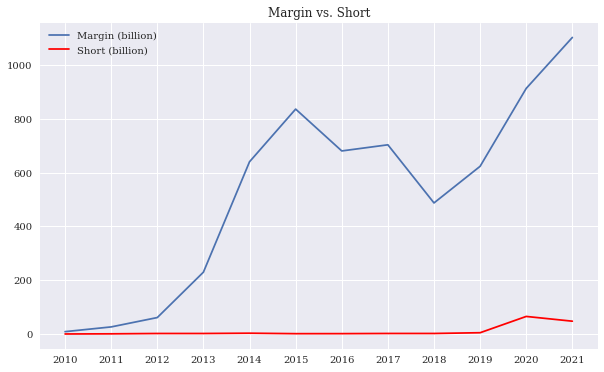

In [89]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
#
ax.set_title("Margin vs. Short")
ax.plot(rzDF["Margin"], label='Margin (billion)')
ax.plot(rzDF["Short"], label='Short (billion)', c='r')
ax.set_xticks([2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020, 2021])
#labels = ax.set_xticklabels(['2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019','2020', '2021'], rotation=30)
#ax.plot(rq_data_year, label="Short")
ax.legend(loc='best')
plt.savefig('MS.png')

In [96]:
np.sum(dff[dff["Treated"]==0]["Vio_wide"])

504

In [7]:
dff.loc[:, ["Vio_wide", "Rzrq", "Treated", "Post",
           "First", "Two_ten", "Lzhy", "Ddzb", "Sjjg",
           "Zczelog", "Zcfz", "Ssnxlog", "TobinQ", "Cqxz",
           "Hbl", "HHI"]].corr().round(3)

,Vio_wide,Rzrq,Treated,Post,First,Two_ten,Lzhy,Ddzb,Sjjg,Zczelog,Zcfz,Ssnxlog,TobinQ,Cqxz,Hbl,HHI
Vio_wide,1.000,-0.033,-0.028,-0.033,-0.076,0.017,0.022,-0.006,-0.045,-0.019,0.048,0.057,0.011,-0.039,-0.026,0.006
Rzrq,-0.033,1.000,0.718,1.000,0.077,-0.146,-0.108,0.013,0.206,0.544,0.087,0.341,-0.050,0.228,0.040,-0.003
Treated,-0.028,0.718,1.000,0.718,0.111,-0.099,-0.067,0.008,0.161,0.524,0.057,0.254,-0.031,0.177,0.078,-0.008
Post,-0.033,1.000,0.718,1.000,0.077,-0.146,-0.108,0.013,0.206,0.544,0.087,0.341,-0.050,0.228,0.040,-0.003
First,-0.076,0.077,0.111,0.077,1.000,-0.393,-0.041,0.048,0.151,0.190,-0.013,-0.121,-0.097,0.177,0.013,0.060
Two_ten,0.017,-0.146,-0.099,-0.146,-0.393,1.000,0.073,-0.012,0.050,0.023,-0.096,-0.306,-0.032,-0.253,-0.030,-0.002
Lzhy,0.022,-0.108,-0.067,-0.108,-0.041,0.073,1.000,0.119,-0.059,-0.141,-0.063,-0.214,0.062,-0.255,0.001,-0.036
Ddzb,-0.006,0.013,0.008,0.013,0.048,-0.012,0.119,1.000,0.029,0.021,0.012,-0.017,0.023,-0.035,0.004,-0.012
Sjjg,-0.045,0.206,0.161,0.206,0.151,0.050,-0.059,0.029,1.000,0.370,0.073,0.071,-0.091,0.116,0.017,0.046
Zczelog,-0.019,0.544,0.524,0.544,0.190,0.023,-0.141,0.021,0.370,1.000,0.361,0.287,-0.443,0.273,-0.020,0.020


In [8]:
dff_co = dff.loc[:, ["Vio_wide", "Rzrq", "Treated",
           "First", "Two_ten", "Lzhy", "Ddzb", "Sjjg",
           "Zczelog", "Zcfz", "Roa", "Ssnxlog", "TobinQ", "Cqxz",
           "Hbl", "HHI"]]

from scipy.stats import pearsonr
import numpy as np
rho = dff_co.corr()
pval = dff_co.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
s = rho.round(3).astype(str) + p
s.to_csv("Corr202.csv")

In [10]:
dff_co = dff.loc[:, ["Vio_wide", "Rzrq", "Treated",
           "First", "Two_ten", "Lzhy", "Ddzb", "Sjjg",
           "Zczelog", "Zcfz", "Roa", "Ssnxlog", "TobinQ", "Cqxz",
           "Hbl", "HHI"]]

from scipy.stats import pearsonr
import numpy as np
rho = dff_co.corr()
pval = dff_co.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.1] if x<=t]))
s = rho.round(3).astype(str) + p
s.to_csv("Corr203.csv")

In [11]:
s

,Vio_wide,Rzrq,Treated,First,Two_ten,Lzhy,Ddzb,Sjjg,Zczelog,Zcfz,Roa,Ssnxlog,TobinQ,Cqxz,Hbl,HHI
Vio_wide,1.0*,-0.033*,-0.028*,-0.076*,0.017*,0.022*,-0.006,-0.045*,-0.019*,0.048*,-0.091*,0.057*,0.011,-0.039*,-0.026*,0.006
Rzrq,-0.033*,1.0*,0.718*,0.077*,-0.146*,-0.108*,0.013,0.206*,0.544*,0.087*,0.109*,0.341*,-0.05*,0.228*,0.04*,-0.003
Treated,-0.028*,0.718*,1.0*,0.111*,-0.099*,-0.067*,0.008,0.161*,0.524*,0.057*,0.126*,0.254*,-0.031*,0.177*,0.078*,-0.008
First,-0.076*,0.077*,0.111*,1.0*,-0.393*,-0.041*,0.048*,0.151*,0.19*,-0.013,0.153*,-0.121*,-0.097*,0.177*,0.013,0.06*
Two_ten,0.017*,-0.146*,-0.099*,-0.393*,1.0*,0.073*,-0.012,0.05*,0.023*,-0.096*,0.074*,-0.306*,-0.032*,-0.253*,-0.03*,-0.002
Lzhy,0.022*,-0.108*,-0.067*,-0.041*,0.073*,1.0*,0.119*,-0.059*,-0.141*,-0.063*,0.024*,-0.214*,0.062*,-0.255*,0.001,-0.036*
Ddzb,-0.006,0.013,0.008,0.048*,-0.012,0.119*,1.0*,0.029*,0.021*,0.012,-0.023*,-0.017*,0.023*,-0.035*,0.004,-0.012
Sjjg,-0.045*,0.206*,0.161*,0.151*,0.05*,-0.059*,0.029*,1.0*,0.37*,0.073*,0.059*,0.071*,-0.091*,0.116*,0.017*,0.046*
Zczelog,-0.019*,0.544*,0.524*,0.19*,0.023*,-0.141*,0.021*,0.37*,1.0*,0.361*,0.027*,0.287*,-0.443*,0.273*,-0.02*,0.02*
Zcfz,0.048*,0.087*,0.057*,-0.013,-0.096*,-0.063*,0.012,0.073*,0.361*,1.0*,-0.298*,0.136*,-0.189*,0.146*,0.019*,0.009


In [62]:
rho>0.4

,Vio_wide,Rzrq,Treated,First,Two_ten,Lzhy,Ddzb,Sjjg,Zczelog,Zcfz,Roa,Ssnxlog,TobinQ,Cqxz,Hsl,HHI
Vio_wide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Rzrq,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False
Treated,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False
First,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Two_ten,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Lzhy,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Ddzb,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Sjjg,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Zczelog,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False
Zcfz,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


<AxesSubplot:>

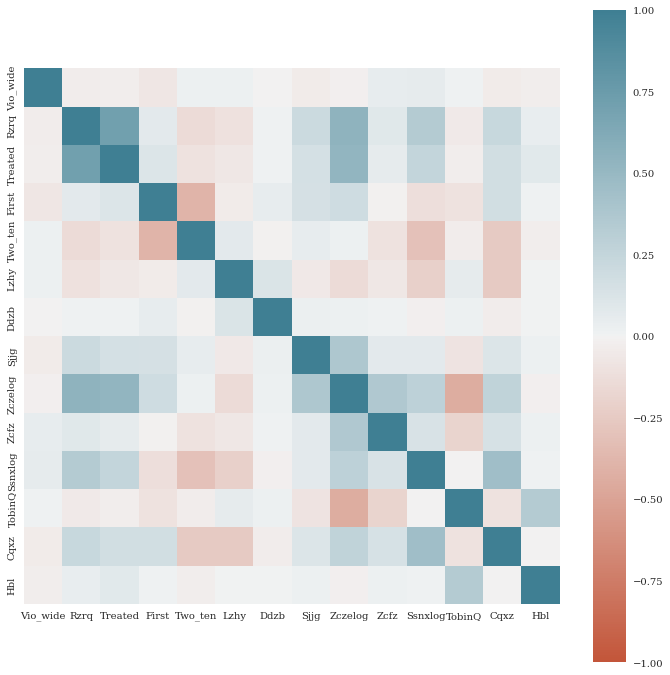

In [111]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)

# sns.diverging_palette(20, 220, as_cmap=True) 用于设置热点图的颜色，但设置规则我暂时不清楚
sns.heatmap(rho, vmin=-1, vmax=1,
            square=True,annot=False, 
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

,index,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Qtyskzj,Zjzy,Zjzy_t,...,Fxszz,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
0,0,000002,2014,0,0,1.746387e+11,25.678537,6.858825e+09,1.552746e+10,0.413210,...,38.0,3.663562,1.0,K,1,3.178054,0.845271,0.077816,7.027766e+09,6.567314e+09
1,1,000002,2015,0,0,1.945915e+11,25.678537,6.858825e+09,1.552746e+10,0.342491,...,39.0,3.688879,1.0,K,1,3.218876,1.415158,0.093969,7.027766e+09,6.567314e+09
2,2,000002,2016,1,1,2.205133e+11,25.678537,6.858825e+09,1.552746e+10,0.301571,...,26.0,3.295837,1.0,K,1,3.258097,0.701672,0.096350,7.027766e+09,6.567314e+09
3,3,000002,2017,0,0,3.302305e+11,25.678537,6.858825e+09,1.552746e+10,0.262605,...,42.0,3.761200,1.0,K,1,3.295837,0.521176,0.101849,7.027766e+09,6.567314e+09
4,4,000002,2018,0,0,4.563822e+11,25.678537,-2.214575e+09,1.552746e+10,0.299477,...,45.0,3.784190,1.0,K,1,3.295837,0.339403,0.093338,7.027766e+09,6.567314e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,10678,603998,2018,0,0,1.537012e+09,21.153106,2.352565e+08,-1.416112e+08,-0.092134,...,0.0,0.000000,0.0,C,0,1.609438,2.933394,0.029387,7.900926e+07,6.949832e+07
10679,10679,603998,2019,1,1,1.793355e+09,21.307354,6.165287e+07,2.837951e+07,0.015825,...,0.0,0.000000,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07
10680,10680,603999,2016,0,0,1.751648e+09,21.283823,7.117054e+06,2.446859e+08,0.139689,...,1.0,0.693147,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07
10681,10681,603999,2017,0,0,1.809583e+09,21.316362,8.561978e+06,2.504609e+08,0.138408,...,1.0,0.693147,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07


In [114]:
rz_dff.to_stata("dta_333333.dta", write_index=False)

In [122]:
dff2020 = pd.read_csv("row_data3.csv")
dff2020

,Code,Time,Vio,Vio_wide,NumVio,NumVio_wide,Qtysk,Qtyfk,Zcze,Zczelog,...,Industry_d,HTobinQ,HHI,Dshgmlog,Fxslog,Rzmr_t,Rzye_t,Rqmc_t,Rqye_t,Ssnxlog
0,2,2009,0,0,0,0,4.049738e+10,5.208563e+09,6.150412e+10,24.842370,...,K70,1.293807,0.075733,2.302585,4.189655,0.000000,0.000000,0.000000,0.000000,2.944439
1,2,2010,0,0,0,0,5.649274e+10,1.310024e+10,8.446798e+10,25.159638,...,K70,1.059200,0.054805,2.397895,4.158883,0.010167,0.002132,0.000031,0.000004,2.995732
2,2,2011,0,0,0,0,6.590512e+10,2.305988e+10,9.172550e+10,25.242066,...,K70,0.626153,0.063567,2.397895,4.094345,0.047444,0.007710,0.001231,0.000207,3.044522
3,2,2012,0,0,0,0,8.910113e+10,2.739208e+10,1.265448e+11,25.563862,...,K70,0.668239,0.071580,2.397895,4.060443,0.036554,0.005646,0.004543,0.001130,3.091042
4,2,2013,0,0,0,0,1.301451e+11,4.418138e+10,1.636583e+11,25.821047,...,K70,0.712191,0.076325,2.397895,3.988984,0.256302,0.027299,0.013770,0.000398,3.135494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22884,605376,2021,0,0,0,0,4.211488e+08,5.020814e+07,1.592191e+09,21.188377,...,C33,2.633841,0.184755,2.197225,1.945910,0.000000,0.000000,0.000000,0.000000,0.693147
22885,605377,2021,0,0,0,0,3.266208e+08,1.432862e+07,3.131245e+09,21.864696,...,C22,1.490081,0.091153,2.197225,1.609438,0.000000,0.000000,0.000000,0.000000,0.693147
22886,605388,2021,0,1,0,1,2.775852e+08,1.695521e+06,1.921355e+09,21.376297,...,C15,8.403486,0.129214,2.302585,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147
22887,605399,2021,0,0,0,0,3.573900e+06,1.390492e+07,1.823445e+09,21.323993,...,C26,3.045007,0.036944,1.945910,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147


In [123]:
row_8 = pd.read_stata("row_8.dta")
row_8

,Code,Time,Vio_wide,NumVio_wide,Zcze,Zczelog,Qtyskzj,Zjzy,Zjzy_t,Qtyskzj_t,...,Fxszz,Fxslg,Sjjg,Industry,Cqxz,Ssnxlog,HTobinQ,HHI,Yylr,Jlr
0,000002,2014,0,0,1.746387e+11,25.709533,6.968828e+09,1.550340e+10,0.413210,0.089314,...,38.0,3.663562,1.0,K,1,3.178054,0.845271,0.077816,6.974131e+09,6.557481e+09
1,000002,2015,0,0,1.945915e+11,25.709533,6.968828e+09,1.550340e+10,0.342491,0.067869,...,39.0,3.688879,1.0,K,1,3.218876,1.415158,0.093969,6.974131e+09,6.557481e+09
2,000002,2016,1,1,2.205133e+11,25.709533,6.968828e+09,1.550340e+10,0.301571,0.337892,...,26.0,3.295837,1.0,K,1,3.258097,0.701672,0.096350,6.974131e+09,6.557481e+09
3,000002,2017,0,0,3.302305e+11,25.709533,6.968828e+09,1.550340e+10,0.262605,0.329650,...,42.0,3.761200,1.0,K,1,3.295837,0.521176,0.101849,6.974131e+09,6.557481e+09
4,000002,2018,0,0,4.563822e+11,25.709533,-2.390631e+09,1.550340e+10,0.299477,-0.017731,...,45.0,3.828641,1.0,K,1,3.332205,0.339403,0.093338,6.974131e+09,6.557481e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,603998,2019,1,1,1.793355e+09,21.307354,6.165287e+07,2.837951e+07,0.015825,0.034379,...,0.0,0.000000,0.0,C,0,1.791759,4.721329,0.034775,1.039226e+08,9.101487e+07
12884,603998,2020,0,0,1.973600e+09,21.403125,1.614949e+08,1.222310e+08,0.061933,0.081828,...,0.0,0.000000,0.0,C,0,1.945910,6.798180,0.035581,9.372988e+07,8.414300e+07
12885,603999,2016,0,0,1.751648e+09,21.283823,7.117054e+06,2.446859e+08,0.139689,0.004063,...,1.0,0.693147,0.0,R,1,0.693147,2.069841,0.093014,7.678633e+07,8.544740e+07
12886,603999,2017,0,0,1.809583e+09,21.316362,8.561978e+06,2.504609e+08,0.138408,0.004731,...,1.0,0.693147,0.0,R,1,1.098612,1.910157,0.076465,8.422745e+07,9.152340e+07


In [125]:
row_8rz = row_8.loc[:, ["Vio_wide", "Rzmr"]]

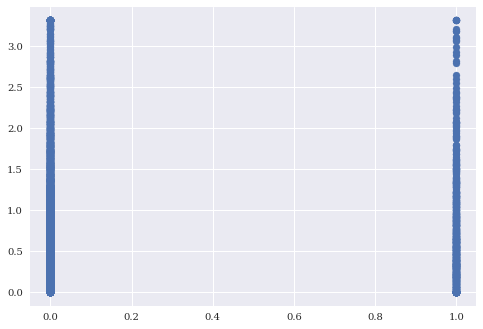

In [126]:
plt.scatter(row_8rz["Vio_wide"], row_8rz["Rzmr"])

In [130]:
np.sum(row_8[row_8["Post"]==1]["Vio_wide"])

525

# 早该用交易金额数据了 草 妈的批

`logit Vio_wide Rzye Roa Zczelog Zcfz HHI Ssnxlog TobinQ First Two_ten Ddzb Hbl i.Lzhy i.Sjjg i.Cqxz i.Time i.Industry, cluster(Code)`